<img src="../../images/course-banner.png">

# **THE TOMATO DISEASE TYPE CLASSIFICATION PROJECT**

## PHASE 1. CREATE THE DATASET

In this notebook, we will create a hdf5 file for the riotu car dataset.


In [7]:
# import the necessary packages
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import sys
import tensorflow as tf

In [8]:
IMAGE_SIZE=224

We now specify the path the dataset located on Google Drive

In [9]:
#CHANGE THESE PATHS ACCORDING TO THE PATH IN YOUR SYSTEM
#DATASET_PATH='/Users/akoubaa/Desktop/udemy-deep-learning-in-practice/02-[intermediate]-car-classification/dataset'
#H5DATASET_FOLDER='/Users/akoubaa/Desktop/udemy-deep-learning-in-practice/02-[intermediate]-car-classification/h5-dataset/'
#TARGET_HDF5_DATASET_PATH=H5DATASET_FOLDER+'vehicle-type-dataset-SIZE'+str(IMAGE_SIZE)+'.hdf5'
#OUTPUT_STATS_FILE=H5DATASET_FOLDER+'vehicle-type-dataset-SIZE'+str(IMAGE_SIZE)+'.hdf5.csv'


DATASET_PATH='C:/Users/Byju/Dropbox/1. BNGPersonal/0. MLDatasets/TLDarchive2/tomato2/All_data/'
H5DATASET_FOLDER='C:/Users/Byju/Dropbox/1. BNGPersonal/0. MLDatasets/TLDarchive2/tomato2/h5-dataset/'
TARGET_HDF5_DATASET_PATH=H5DATASET_FOLDER+'tomato-disease-type-dataset-SIZE'+str(IMAGE_SIZE)+'.hdf5'
OUTPUT_STATS_FILE=H5DATASET_FOLDER+'tomato-disease-type-dataset-SIZE'+str(IMAGE_SIZE)+'.hdf5.csv'


print(DATASET_PATH)
print(TARGET_HDF5_DATASET_PATH)

C:/Users/Byju/Dropbox/1. BNGPersonal/0. MLDatasets/TLDarchive2/tomato2/All_data/
C:/Users/Byju/Dropbox/1. BNGPersonal/0. MLDatasets/TLDarchive2/tomato2/h5-dataset/tomato-disease-type-dataset-SIZE224.hdf5


In [10]:
class_label_string_length="S30"

# **1. Dataset Loading**

In [11]:
sys.path.append('C:/Users/Byju/Dropbox/2. Courses/Udemy/DL_II-Transfer_Learning/Section07/dataset-design-notebooks')
import anis_koubaa_udemy_computer_vision_lib  
from anis_koubaa_udemy_computer_vision_lib import *

In [12]:
classes=os.listdir(DATASET_PATH)
classes.sort()
print(classes)



['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [13]:
print(DATASET_PATH)
data, labels=anis_koubaa_udemy_computer_vision_lib.load_rgb_data(DATASET_PATH,
                                                                 IMAGE_SIZE, 
                                                                 directory_depth=0, 
                                                                 max_number_of_images=None, 
                                                                 shuffle=True)

C:/Users/Byju/Dropbox/1. BNGPersonal/0. MLDatasets/TLDarchive2/tomato2/All_data/
Loading images...
loaded  50  images so far ...
loaded  100  images so far ...
loaded  150  images so far ...
loaded  200  images so far ...
loaded  250  images so far ...
loaded  300  images so far ...
loaded  350  images so far ...
loaded  400  images so far ...
loaded  450  images so far ...
loaded  500  images so far ...
loaded  550  images so far ...
loaded  600  images so far ...
loaded  650  images so far ...
loaded  700  images so far ...
loaded  750  images so far ...
loaded  800  images so far ...
loaded  850  images so far ...
loaded  900  images so far ...
loaded  950  images so far ...
loaded  1000  images so far ...
loaded  1050  images so far ...
loaded  1100  images so far ...
loaded  1150  images so far ...
loaded  1200  images so far ...
loaded  1250  images so far ...
loaded  1300  images so far ...
loaded  1350  images so far ...
loaded  1400  images so far ...
loaded  1450  images so f

# **2. Dataset Visualization**

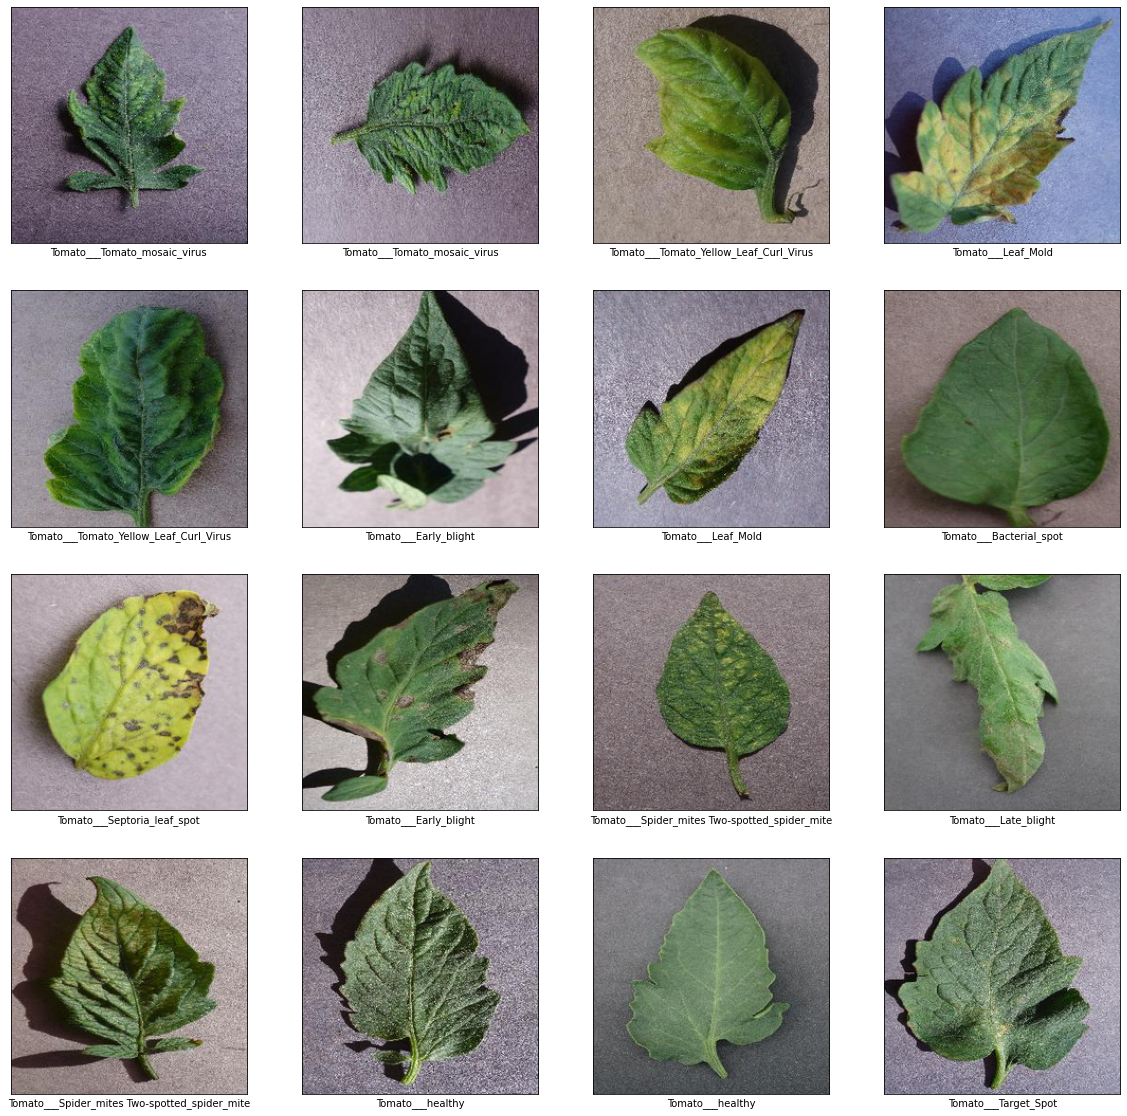

In [16]:
anis_koubaa_udemy_computer_vision_lib.plot_sample_from_dataset(data, labels,
                                                               rows=4, colums=4, 
                                                               width=20,height=20)

In [14]:
np.unique(labels)

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Leaf_Mold',
       'Tomato___Septoria_leaf_spot',
       'Tomato___Spider_mites Two-spotted_spider_mite',
       'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U45')

In [15]:
number_of_classes=len(np.unique(labels))
number_of_classes

10

Label = Tomato___Bacterial_spot
image shape:  (224, 224, 3)


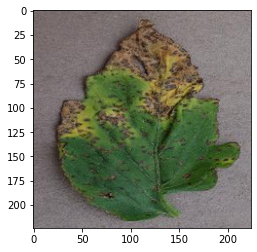

In [16]:
anis_koubaa_udemy_computer_vision_lib.display_image(data, labels, index=50)

In [17]:
anis_koubaa_udemy_computer_vision_lib.display_dataset_shape(data, labels)

Shape of images:  (10791, 224, 224, 3)
Shape of labels:  (10791,)


In [18]:
anis_koubaa_udemy_computer_vision_lib.display_dataset_folders(DATASET_PATH)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


# 3. Data Normalization

In [19]:
data_images=anis_koubaa_udemy_computer_vision_lib.normalize_data(data)


normalize data


### Binary Labels Creation (One-Hot Encoding)

In [20]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

# perform one-hot encoding on the labels
print ("labels: ", labels[:10])
lb = LabelBinarizer()
binary_labels = lb.fit_transform(labels)
print ("train_binary_labels after Binarizer: ", binary_labels[:10])

labels:  ['Tomato___Bacterial_spot' 'Tomato___healthy' 'Tomato___Bacterial_spot'
 'Tomato___Early_blight' 'Tomato___Tomato_mosaic_virus'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___healthy'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Early_blight'
 'Tomato___Spider_mites Two-spotted_spider_mite']
train_binary_labels after Binarizer:  [[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]


In [21]:
#create dictionary
import collections
car_dict={}

for i,label in enumerate(binary_labels):
    #print('---')
    #print(i)
    #print(np.argmax(label))
    #print(testLabels[i])
    car_dict[np.argmax(label)]=labels[i]
    #print(car_dict)
    if (len(car_dict)==number_of_classes):
        break
#print(sorted(car_dict.items()))
print(car_dict)

{0: 'Tomato___Bacterial_spot', 9: 'Tomato___healthy', 1: 'Tomato___Early_blight', 8: 'Tomato___Tomato_mosaic_virus', 7: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 5: 'Tomato___Spider_mites Two-spotted_spider_mite', 4: 'Tomato___Septoria_leaf_spot', 2: 'Tomato___Late_blight', 3: 'Tomato___Leaf_Mold', 6: 'Tomato___Target_Spot'}


In [22]:
H5DATASET_FOLDER

'C:/Users/Byju/Dropbox/1. BNGPersonal/0. MLDatasets/TLDarchive2/tomato2/h5-dataset/'

# 4. Create HDF5 Dataset

In [23]:
import h5py

from pathlib import Path
#create the folder if it does not exist
Path(H5DATASET_FOLDER).mkdir(parents=True, exist_ok=True)

hf=h5py.File(TARGET_HDF5_DATASET_PATH, 'w')

images_shape=data.shape
labels_shape=labels.shape

In [24]:
images_shape

(10791, 224, 224, 3)

In [25]:
hf.create_dataset("images",
                  shape=images_shape,
                  maxshape=images_shape,
                  compression="gzip",
                  compression_opts=9,
                  data=data_images)

<HDF5 dataset "images": shape (10791, 224, 224, 3), type "<f8">

In [26]:
labels_in_ascii= [n.encode('unicode_escape') for n in labels]
#print(labels_in_ascii)

In [27]:
hf.create_dataset("labels",
            shape=labels_shape,
            compression="gzip",
            compression_opts=9,
            data=labels_in_ascii,dtype=class_label_string_length
            )



<HDF5 dataset "labels": shape (10791,), type "|S30">

In [28]:
hf.create_dataset("binary_labels",
                  shape=binary_labels.shape,
                  maxshape=binary_labels.shape,
                  compression="gzip",
                  compression_opts=9,
                  data=binary_labels)

<HDF5 dataset "binary_labels": shape (10791, 10), type "<i4">

In [29]:
hf.close()

In [30]:
hf = h5py.File(TARGET_HDF5_DATASET_PATH, "r")

In [31]:
labels_in_ascii = np.array(hf["labels"]).astype(class_label_string_length)

In [32]:
#get labels in string format: decode from ASCII
labels = [n.decode('unicode_escape') for n in labels_in_ascii]
#print(asciiList)
print ('number of labels:',len(labels))

number of labels: 10791


In [33]:
np.unique(labels)

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Leaf_Mold',
       'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spot',
       'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Cu',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U30')

In [34]:
hf.close()

# 5. Dataset Distribution

In [35]:
def get_data_distribution(IMAGE_DIRECTORY, directory_depth=2, output_file=None,plot_stats=True):
    print("Loading images...")
    #list structure to collect the statistics
    stats=[]

    for folder,directory_name,file_name in os.walk(IMAGE_DIRECTORY):
        if (len(file_name)!=0):
          if(directory_depth!=0):
              #print (folder, directory_name, file_name)
            folders_list =folder.split('/')[0:-1]
          else:
            folders_list =folder.split('/')[-1:]
            
          #print(folders_list)
          label = folders_list[-directory_depth]
          #print (label)
          for i in range(len(file_name)):
                image_name = file_name[i]
                image_path = os.path.join(folder, image_name)
                if ('.DS_Store' not in image_path):
                #print(image_path)
                    try:
                        img = Image.open(image_path)
                        #print(image_path)
                        rgbimg = Image.new("RGB", img.size)
                        rgbimg.paste(img)
                        img=rgbimg


                        width,height = img.size
                        #get the size of the image in KB
                        size_kb=os.stat(image_path).st_size/1000
                        #add the size to a list of sizes to be 
                        stats.append([label,os.path.basename(image_path),width,height,size_kb])
                        #print(stats)
                    except Exception:
                        pass

    if (output_file is not None):
        #convert the list into a dataframe to make it easy to save into a CSV
        stats_dataframe = pd.DataFrame(stats,columns=['Class','Filename','Width','Height','Size_in_KB'])
        stats_dataframe.to_csv(output_file,index=False)
        print("Stats collected and saved in .",output_file)
    else:
        print("Stats collected");


    return stats

In [36]:

stats = get_data_distribution(DATASET_PATH, directory_depth=0,output_file=OUTPUT_STATS_FILE)
#print(stats)

Loading images...
Stats collected and saved in . C:/Users/Byju/Dropbox/1. BNGPersonal/0. MLDatasets/TLDarchive2/tomato2/h5-dataset/tomato-disease-type-dataset-SIZE224.hdf5.csv


10  classes found in the dataset
Images of the whole dataset have an average size of  16.899149939764637
sizes of class [ Tomato___Bacterial_spot ] have an average size of  12.91069999999998
sizes of class [ Tomato___Early_blight ] have an average size of  15.18133395004626
sizes of class [ Tomato___healthy ] have an average size of  22.233164533820847
sizes of class [ Tomato___Late_blight ] have an average size of  13.424299908842306
sizes of class [ Tomato___Leaf_Mold ] have an average size of  15.737368663594472
sizes of class [ Tomato___Septoria_leaf_spot ] have an average size of  17.49857923497269
sizes of class [ Tomato___Spider_mites Two-spotted_spider_mite ] have an average size of  19.838457564575645
sizes of class [ Tomato___Target_Spot ] have an average size of  20.321545950864433
sizes of class [ Tomato___Tomato_mosaic_virus ] have an average size of  19.12478384050368
sizes of class [ Tomato___Tomato_Yellow_Leaf_Curl_Virus ] have an average size of  13.039750000000002
num

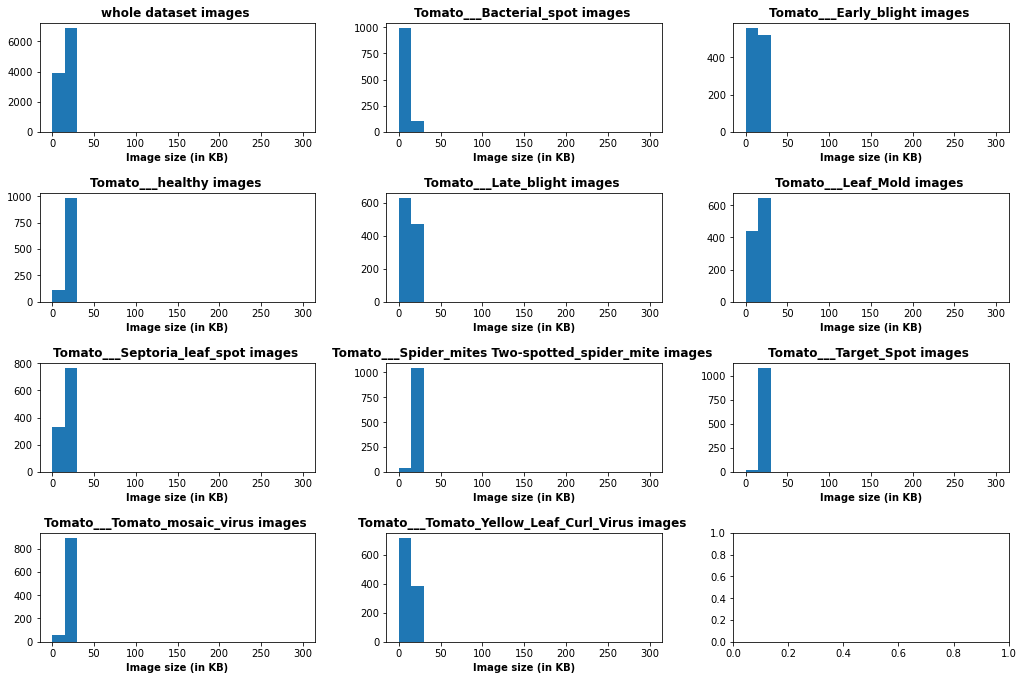

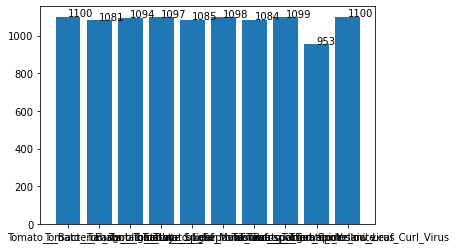

In [37]:
anis_koubaa_udemy_computer_vision_lib.plot_dataset_distribution (stats, num_cols=3, width=15, height=10, histogram_bins = 20, histogram_range=[0, 300], figure_padding=4)